## Path

`dataset` = train/dataset.yaml

`model` = runs/train/exp/weights/last.pt

# 1. Instalasi Package (jika diperlukan)

In [ ]:
!pip install -r requirements.txt

# 2. Main

In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

#### Load Model (runs)

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp/weights/last.pt')

Using cache found in C:\Users\ESPB/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-7 Python-3.9.18 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = 'pl-ty-sry.png'

In [5]:
r = model(img)
r.print()

image 1/1: 480x850 1 please, 1 sorry, 1 thank_you
Speed: 16.7ms pre-process, 134.9ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


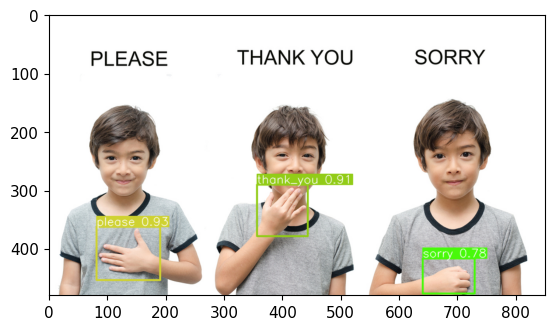

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(r.render()))
plt.show()

In [7]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

while cap.isOpened():
    ret, frame = cap.read()
     
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
cap.release()
cv2.destroyAllWindows()